# Abstract:

### Heart disease is easier to treat when it is detected in the early stages. Machine learning techniques may aid a more efficient analysis in the prediction of the disease. Moreover, this prediction is one of the most central problems in medicine, as it is one of the leading diseases related to an unhealthy lifestyle. So, an early prediction of this disease will be useful for a cure or aversion.

# Problem Statement:

### Analyze the heart disease dataset to explore the machine learning algorithms and build decision tree model to predict the disease.

# Variable Description:

### age=Age of the patient 
### gender= Gender of the patient - (0,1) - (Male, Female)
### chest_pain= It refers to the chest pain experienced by the patient -(0,1,2,3)
### rest_bps= Blood pressure of the patient while resting(in mm/Hg)
### cholesterol= Patient's cholesterol level (in mg/dl) 
### fasting_blood_sugar= The blood sugar of the patient while fasting
### rest_ecg= Potassium level (0,1,2)
### thalach= The patient’s maximum heart rate
### exer_angina= It refers to exercise-induced angina - (1=Yes, 0=No)
### old_peak= It is the ST depression induced by exercise relative to rest(ST relates to the position on ECG plots)
### slope= It refers to the slope of the peak of the exercise ST-Segment- (0,1,2) 
### ca= Number of major vessels - (0,1,2,3,4) 
### thalassemia= It refers to thalassemia which is a blood disorder - (0,1,2,3)
### target =The patient has heart disease or not - (1=Yes, 0=No)

# Import the required packages

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import sklearn.metrics

In [7]:
df=pd.read_csv("HeartDisease.csv") # loading the dataset
df.head() # reading the first five rows

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
df.shape # printing the rows and columns

(303, 14)

In [14]:
df.describe(include='all') # returns the statistical summary  for  CATEGORICAL DATA


,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
df.describe() # returns the statistical summary  for NUMERICAL DATA


,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [13]:
df.info()         #  dataset size and types


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  303 non-null    int64  
 1   gender               303 non-null    int64  
 2   chest_pain           303 non-null    int64  
 3   rest_bps             303 non-null    int64  
 4   cholestrol           303 non-null    int64  
 5   fasting_blood_sugar  303 non-null    int64  
 6   rest_ecg             303 non-null    int64  
 7   thalach              303 non-null    int64  
 8   exer_angina          303 non-null    int64  
 9   old_peak             303 non-null    float64
 10  slope                303 non-null    int64  
 11  ca                   303 non-null    int64  
 12  thalassemia          303 non-null    int64  
 13  target               303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [3]:
df.isnull().sum() # printing the null values

age                    0
gender                 0
chest_pain             0
rest_bps               0
cholestrol             0
fasting_blood_sugar    0
rest_ecg               0
thalach                0
exer_angina            0
old_peak               0
slope                  0
ca                     0
thalassemia            0
target                 0
dtype: int64

<AxesSubplot:>

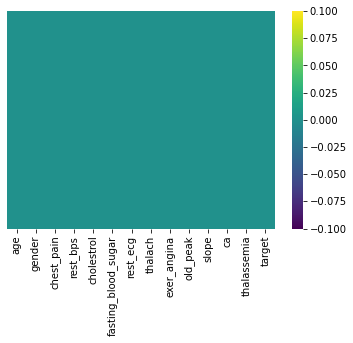

In [12]:
sns.heatmap(df.isnull(),yticklabels=False,cmap="viridis") # the another way to see  null values

In [ ]:
# there is no null values in dataset

In [4]:
df.columns # reading the columns from dataset

Index(['age', 'gender', 'chest_pain', 'rest_bps', 'cholestrol',
       'fasting_blood_sugar', 'rest_ecg', 'thalach', 'exer_angina', 'old_peak',
       'slope', 'ca', 'thalassemia', 'target'],
      dtype='object')

<AxesSubplot:xlabel='target', ylabel='count'>

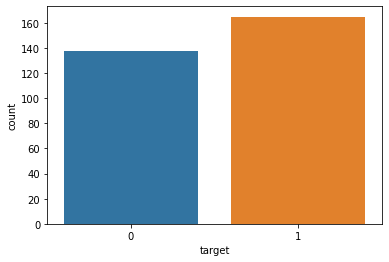

In [15]:
sns.countplot(x='target',data=df) # counting how many have heart disease and how many donot have

<AxesSubplot:xlabel='target', ylabel='count'>

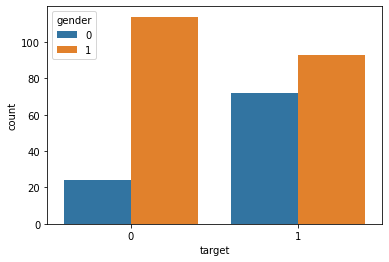

In [16]:
sns.countplot(x='target', hue='gender',data=df) # counting how many have heart disease and how many donot have occording the gender

<AxesSubplot:>

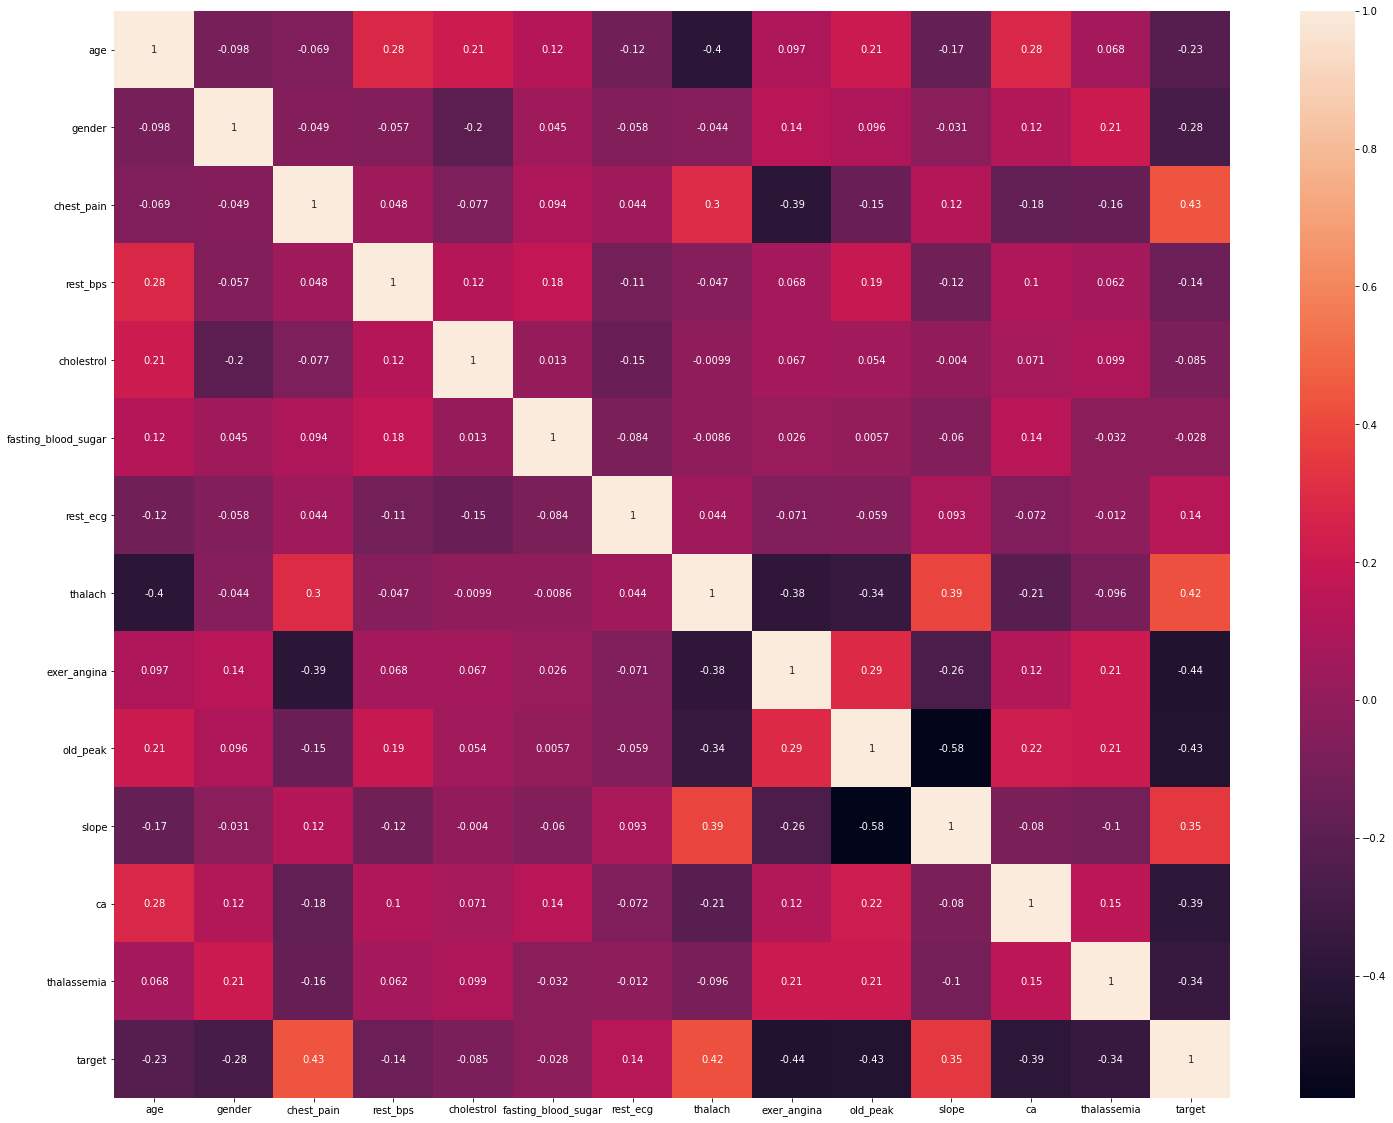

In [11]:
plt.figure(figsize=(25,20))
sns.heatmap(df.corr(),annot=True) # finding the correlation by using heat map

# Training Data and Testing Data Split

In [7]:
x = df.drop(['target'], axis=1)
y = df[['target']]

In [8]:
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.3,random_state=0)

## gini

In [17]:
dTree=DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=0)
dTree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [18]:
print(dTree.score(x_train,y_train))
print(dTree.score(x_test,y_test))

0.8679245283018868
0.8131868131868132


## entropy 

In [21]:
dTree=DecisionTreeClassifier(criterion='entropy', max_depth=3,random_state=0)
dTree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [22]:
print(dTree.score(x_train,y_train))
print(dTree.score(x_test,y_test))

0.8632075471698113
0.7582417582417582


# conclusion

In [ ]:
# gini - train score= 0.8679245283018868
#        test score=0.8131868131868132
# entropy - train score= 0.8632075471698113
#        test score= 0.7582417582417582
